In [ ]:
!pip install gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


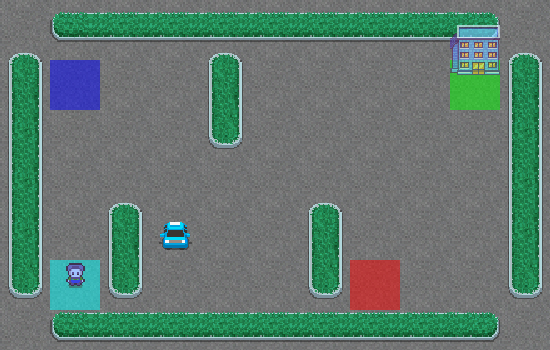

In [3]:
import gym
from  google.colab.patches import cv2_imshow
env = gym.make("Taxi-v3").env
env.reset()
cv2_imshow(env.render(mode='rgb_array'))

In [ ]:
print('Action space: ', env.action_space)
print('State space: ', env.observation_space)

Action space:  Discrete(6)
State space:  Discrete(500)


In [4]:
env.s 328. # set environment to illustration's state
epochs 0
penalties, reward = 0, 0
frames = [] for animation
done False
while not done:
action env.action_space.sample ()
state, reward, done, info = env.step (action) if reward == -10:
penalties += 1
# Put each rendered frame into dict for animation
frames.append({
'Frame: env.render (mode='ansi'),
'state': state,
'action': action,
'reward': reward
epochs += 1
print("Timesteps taken: ".format (epochs)) print("Penalties incurred: ()".format (penalties))

SyntaxError: ignored

# Q-Learning examples

In [7]:
# -*- coding: utf-8 -*-
"""Q-learning.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ZMpIaCN3KNazOo8elXZnWOYI2uzkFzuq
"""

!pip install gym

import gym

env = gym.make("Taxi-v3").env
env.reset()
cv2_imshow(env.render(mode='rgb_array'))
"""
our restructured problem statement (from Gym docs):

There are 4 locations (labeled by different letters),
and our job is to pick up the passenger at one location and drop him off at another.
We receive +20 points for a successful drop-off and lose 1 point for every time-step it takes.
There is also a 10 point penalty for illegal pick-up and drop-off actions.
"""
env.reset() # reset environment to a new, random state
cv2_imshow(env.render(mode='rgb_array'))
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

"""
We can actually take our illustration above, encode its state,
and give it to the environment to render in Gym.
Recall that we have the taxi at row 3, column 1, our passenger is at location 2, and our destination is location 0.
Using the Taxi-v2 state encoding method, we can do the following:
"""

state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
cv2_imshow(env.render(mode='rgb_array'))
"""
The Reward Table
When the Taxi environment is created, there is an initial Reward table that's also created, called `P`.
We can think of it like a matrix that has the number of states as rows and number of actions as columns, i.e.
a states × actions matrix.

Since every state is in this matrix, we can see the default reward values assigned to our illustration's state:
"""

env.P[328]



env.s = 328  # set environment to illustration's state
epochs = 0
penalties, reward = 0, 0
frames = [] # for animation
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)
    if reward == -10:
        penalties += 1
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

print_frames(frames)

"""
Implementing Q-learning in python
Training the Agent
First, we'll initialize the Q-table to a 500x6 matrix of zeros:
"""

#Implementing Q-learning
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Commented out IPython magic to ensure Python compatibility.
# %%time
# """Training the agent"""
#
# import random
# from IPython.display import clear_output
#
# # Hyperparameters
# alpha = 0.1
# gamma = 0.6
# epsilon = 0.1
#
# # For plotting metrics
# all_epochs = []
# all_penalties = []
#
# for i in range(1, 100001):
#     state = env.reset()
#
#     epochs, penalties, reward, = 0, 0, 0
#     done = False
#
#     while not done:
#         if random.uniform(0, 1) < epsilon:
#             action = env.action_space.sample() # Explore action space
#         else:
#             action = np.argmax(q_table[state]) # Exploit learned values
#
#         next_state, reward, done, info = env.step(action)
#
#         old_value = q_table[state, action]
#         next_max = np.max(q_table[next_state])
#
#         new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
#         q_table[state, action] = new_value
#
#         if reward == -10:
#             penalties += 1
#
#         state = next_state
#         epochs += 1
#
#     if i % 100 == 0:
#         clear_output(wait=True)
#         print(f"Episode: {i}")
#
# print("Training finished.\n")


import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")





#Now that the Q-table has been established over 100,000 episodes,
#let's see what the Q-values are at our illustration's state:
q_table[328]

"""
The max Q-value is "north" (-1.971),
so it looks like Q-learning has effectively learned the best action to take in our illustration's state!

Evaluate agent's performance after Q-learning
"""

total_epochs, total_penalties = 0, 0
episodes = 100
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        if reward == -10:
            penalties += 1
        epochs += 1
    total_penalties += penalties
    total_epochs += epochs
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 100000
Training finished.

Results after 100 episodes:
Average timesteps per episode: 12.87
Average penalties per episode: 0.0
